In [1]:
import json
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from functions.helpers import make_plot, make_histogram

In [2]:
# Load configuration file with env variables
with open('config.json', 'r') as f:
    config = json.load(f)

MAX_SUPPLY = config['MAX_SUPPLY']
INITIAL_AIRDROP = config['TOKENOMICS']['INITIAL_AIRDROP']
SEED = config['SEED']
PROBABILITY = config['PROBABILITY']

# Load eligible addresses
with open('output/eligible_addresses.json', 'r') as f:
    addresses = json.load(f)
addresses_list = addresses['addresses']

In [3]:
# Set the seed of pseudorandom number generator
random.seed(SEED, version=2)

In [4]:
total_airdrop_amount = int(MAX_SUPPLY * INITIAL_AIRDROP / 100)
# The minimum possible airdrop received will be 1/10 of the possible maximum received.
random_numbers = [random.uniform(0.1, 1) for _ in range(0, len(addresses_list))]
addresses_shares = np.array(random_numbers) / sum(random_numbers)
# Rounding in order to not have decimal points.
addresses_amount = np.round(addresses_shares * total_airdrop_amount).astype(int)

In [5]:
print(f"$LUCK total supply: {MAX_SUPPLY}")
print(f"$LUCK virtual airdrop supply: {total_airdrop_amount}")
print(f"$LUCK effective airdrop supply: {np.sum(addresses_amount)}")

$LUCK total supply: 7021003008
$LUCK virtual airdrop supply: 2773296188
$LUCK effective airdrop supply: 2773296201


In [6]:
mean_airdrop = np.mean(addresses_amount)
min_airdrop = np.min(addresses_amount)
max_airdrop = np.max(addresses_amount)
print(f"$LUCK mean of airdrop per address: {mean_airdrop}")
print(f"$LUCK min of airdrop per address: {min_airdrop}")
print(f"$LUCK max of airdrop per address: {max_airdrop}")

$LUCK mean of airdrop per address: 26026.65453845865
$LUCK min of airdrop per address: 4731
$LUCK max of airdrop per address: 47311


### Creating airdrop file

In [7]:
airdrop_file = []
for idx, address in enumerate(addresses_list):
    airdrop_file.append(
        {
            "address": address,
            "amount": str(addresses_amount[idx])
        }
    )

with open('output/airdrop_file.json', 'w') as outfile:
    json.dump(
        airdrop_file,
        outfile,
    )

### Creating bins file

In [8]:
data = {'address': addresses_list, '$LUCK amount': addresses_amount}
df = pd.DataFrame(data)
df.head()

,address,$LUCK amount
0,juno1qhlmw8dxf4vwdf5xkwnc0wfyyqefqmk00uszr8,15979
1,juno1r8an2qm0ptft99ggmzz2len35pzdwgcszjp64c,30140
2,juno1xyke6grw6n7asuwremqw9jdgl7c8x43j9umcd4,8718
3,juno1606tx3lkrdqmj0tkrqjqhhrjqqjfcuatq0xzta,33487
4,juno107kuxmya29mguyyxfn4aw4vy39llrz00dsh7gx,17292


In [14]:
df = df.sort_values(by = ['$LUCK amount'],  ascending=True)

BINS = int(100 / PROBABILITY)
df['range'] = pd.cut(df['$LUCK amount'], BINS)
df['bin'] = pd.cut(df['$LUCK amount'], BINS, labels=np.arange(1, BINS+1, 1))
addresses_list = df['address'].tolist()
addresses_bin = df['bin'].tolist()
df.head()

,address,$LUCK amount,range,bin
6170,juno13asy9mt0fmkl80g9csg9mzkvfxj99d42wvtq5e,4731,"(4688.42, 8989.0]",1
12407,juno1efjw2wj2cmqav6wyhgmhzr2yefvnc3zp53gy30,4731,"(4688.42, 8989.0]",1
80973,juno1f60cdwxgsdscrzhgrlptews6qlayzphy62ngs6,4732,"(4688.42, 8989.0]",1
13553,juno1p7slsl5qd8g6rkgs6tvpvjs4cjjx4ckm6c8pxk,4733,"(4688.42, 8989.0]",1
46158,juno15d6ndw0dc4gtfpzvwlwlhhaxnqh5204vyas4ph,4733,"(4688.42, 8989.0]",1


In [11]:
df['bin'].value_counts(sort=False)

1     10722
2     10604
3     10621
4     10739
5     10670
6     10528
7     10539
8     10802
9     10628
10    10703
Name: bin, dtype: int64

In [ ]:
airdrop_file = []
for idx, address in enumerate(addresses_list):
    airdrop_file.append(
        {
            "address": address,
            "amount": str(addresses_bin[idx])
        }
    )

with open('output/airdrop_file_bin.json', 'w') as outfile:
    json.dump(
        airdrop_file,
        outfile,
    )

### Airdrop visualization

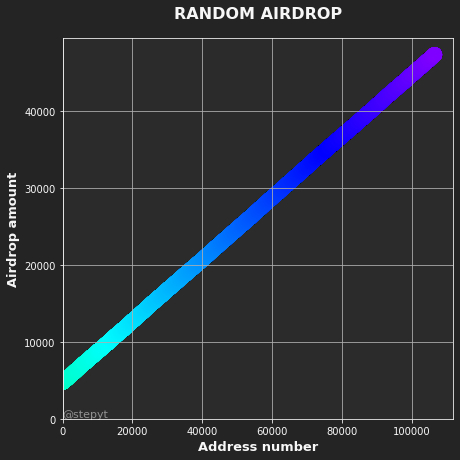

In [8]:
sorted_amount = np.sort(addresses_amount)
addresses_number = np.linspace(0, len(sorted_amount), len(sorted_amount))

data = [addresses_number, sorted_amount]
title = 'Random airdrop'
make_plot(data, title, save_fig=True, fig_title='allocations.png')

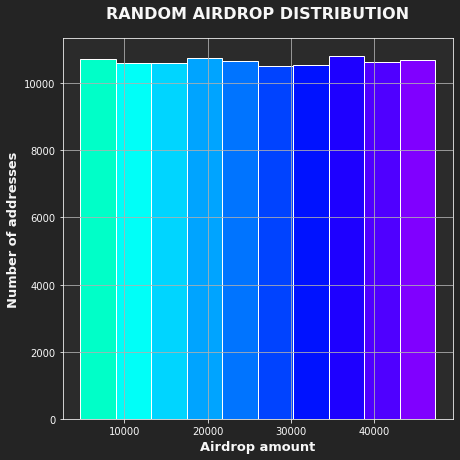

In [9]:
title = 'Random airdrop distribution'
make_histogram(sorted_amount, 10, title, save_fig=True, fig_title='histogram.png')